In [1]:
%matplotlib notebook
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
#import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.misc import imread

In [43]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Mar  9 2019 15:06:42
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012246196513226696 y=0.007528875304464409 z=-4.529766384857568e-05 vx=-0.002977509060539432 vy=0.0005196272260244045 vz=7.716255120345911e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.041258932999459125 y=0.3143342414090862 z=0.028697467456984704 vx=-12.254319160571612 vy=-0.9553420041882094 vz=1.0458785453484094>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.42146563703371775 y=-0.5822813543687417 z=0.016112894679529973 vx=5.962294718483822 vy=-4.320328498402832 vz=-0.403452133194268>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9283011176696948 y=0.3564081321895419 z=-5.846429717789078e-05 vx=-2.3186436741180527 vy=-5.904385726074369 vz=0.0003515866

In [44]:
def rotate(theta, index):
    x_ = sim.particles[index].x * np.cos(theta) - sim.particles[index].y* np.sin(theta)
    y_ = sim.particles[index].x * np.sin(theta) + sim.particles[index].y* np.cos(theta)
    return x_ , y_
    
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


sim.t = 0
sim.move_to_com()
Noutputs = 50000
#years = 2285-2019.
years = 2680-2019.
#position in co-rotating frame
sun_pos = np.zeros((Noutputs,2))
earth_pos = np.zeros((Noutputs,2))
cruithne_pos = np.zeros((Noutputs,2))
times = np.zeros(Noutputs)
i = 0


x_earth = sim.particles[3].x
y_earth = sim.particles[3].y
z_earth = sim.particles[3].z
pos = (sim.particles[3].x, sim.particles[3].y)
theta = 0
for time in np.linspace(0,years,Noutputs):
    #print(time)
    
    sim.integrate(time)
    new_x_earth = sim.particles[3].x
    new_y_earth = sim.particles[3].y
    new_z_earth = sim.particles[3].z
    new_pos = (sim.particles[3].x, sim.particles[3].y)
    
    #theta = 2*np.arcsin( (np.sqrt((new_x_earth-x_earth)**2 + (new_y_earth-y_earth)**2)/2 ) \
                        #/np.sqrt(new_x_earth**2 + new_y_earth**2))    
        
    theta -= angle_between(pos,new_pos)    
    print(theta)
    angle = theta % (2*np.pi)
    earth_pos[i] = rotate(angle, 3)
    sun_pos[i] =  rotate(angle, 0)
    cruithne_pos[i] = rotate(angle, 5)
    
    x_earth = new_x_earth
    y_earth = new_y_earth
    z_earth = new_z_earth
    pos = new_pos
    #energy_deltas[i] = sim.calculate_energy()- energy_0
    times[i] = time
    i += 1
#print(sun_pos)
#print(earth_pos)
#print(cruithne_pos)


0.0
-0.08425405193414648
-0.16834510751051146
-0.2522664498931807
-0.33601266057686313
-0.4195796408769002
-0.5029646219947835
-0.5861661644441373
-0.6691841474079856
-0.7520197485507396
-0.8346754149560417
-0.9171548259622573
-0.9994628486979689
-1.0816054871175513
-1.1635898253174353
-1.2454239658805273
-1.3271169639505986
-1.4086787576819118
-1.490120095645829
-1.5714524617133705
-1.6526879978748819
-1.7338394253939946
-1.8149199646167282
-1.8959432536860374
-1.9769232663617808
-2.0578742291123766
-2.1388105376228124
-2.2197466728513633
-2.3006971167570764
-2.381676267796409
-2.4626983562533735
-2.5437773595064614
-2.624926917520132
-2.7061602489801673
-2.7874900683859445
-2.8689285043070094
-2.9504870190747448
-3.032176330290336
-3.1140063346093174
-3.1959860343303115
-3.278123467376537
-3.3604256413027214
-3.44289847199516
-3.525546727767239
-3.6083739795839422
-3.6913825581704205
-3.774573518767974
-3.857946614293024
-3.9415002776291526
-4.025231613737655
-4.109136402208499
-4.19

-57.16330610255631
-57.24622930394534
-57.3289062846033
-57.41134129739297
-57.49354016082392
-57.57551018565807
-57.65726009538187
-57.73879994188683
-57.82014101760051
-57.90129576511675
-57.98227768495939
-58.06310124133515
-58.14378176479562
-58.224335350620514
-58.304778753546294
-58.385129282151155
-58.46540469664733
-58.54562311131782
-58.62580290028068
-58.705962604675555
-58.7861208400512
-58.866296203481234
-58.946507180321994
-59.026772050641235
-59.1071087953608
-59.18753500216061
-59.268067771203945
-59.34872362076469
-59.4295183928753
-59.510467159178745
-59.59158412724946
-59.6728825477426
-59.75437462283399
-59.83607141652352
-59.91798276748912
-60.0001172052973
-60.082481870894206
-60.16508244240082
-60.24792306725309
-60.33100630167885
-60.41433305878803
-60.49790256696831
-60.58171233989779
-60.66575815913759
-60.75003407040752
-60.83453239466503
-60.91924375494332
-61.00415711968535
-61.08925986306386
-61.17453784250235
-61.25997549330725
-61.34555593999306
-61.4312

-117.22704893363898
-117.3114992965972
-117.39620608154189
-117.48115924088528
-117.56634678497602
-117.651754836545
-117.73736770661087
-117.82316799227313
-117.90913669646996
-117.9952533692565
-118.08149626939824
-118.1678425448642
-118.25426843015212
-118.34074945610253
-118.42726066657673
-118.51377683750947
-118.6002726971995
-118.68672314921164
-118.77310349773188
-118.85938967152498
-118.94555844073972
-119.03158762139724
-119.11745626386609
-119.20314482283545
-119.28863530709302
-119.37391140797632
-119.45895860584515
-119.54376425437708
-119.62831764292582
-119.7126100375858
-119.79663470193712
-119.88038689866464
-119.96386387334678
-120.04706482191527
-120.12999084370863
-120.21264488214597
-120.29503165476432
-120.37715757421294
-120.45903066178826
-120.54066045503362
-120.62205791080568
-120.70323530505631
-120.78420613041739
-120.86498499251157
-120.94558750575051
-121.02603018922528
-121.1063303631507
-121.18650604620183
-121.26657585396968
-121.34655889864939
-121.426

-178.46676207177515
-178.54741459103144
-178.62818549598435
-178.7090903763962
-178.79014411504713
-178.87136078458016
-178.95275354789865
-179.0343345630114
-179.11611489157514
-179.19810441032908
-179.28031172537828
-179.36274408999975
-179.44540732706108
-179.52830575733736
-179.61144213510119
-179.69481759240833
-179.77843159349874
-179.86228190059907
-179.94636455225165
-180.03067385561354
-180.11520239427506
-180.1999410523757
-180.28487905547993
-180.3700040286704
-180.45530207207415
-180.54075785368744
-180.62635471901064
-180.71207481665994
-180.79789923878735
-180.88380817482403
-180.96978107676824
-181.05579683398264
-181.14183395524822
-181.22787075565597
-181.31388554580673
-181.399856820742
-181.4857634460515
-181.57158483870515
-181.65730114031487
-181.74289338056892
-181.82834362858242
-181.9136351306509
-181.998752433567
-182.08368149242753
-182.16840976204446
-182.25292627158595
-182.33722168244333
-182.42128832960006
-182.50512024702445
-182.58871317782086
-182.67206

-238.90147693796726
-238.985215418554
-239.06873333572517
-239.15202821311848
-239.2350991506781
-239.31794679774166
-239.4005733199672
-239.4829823597006
-239.5651789887461
-239.6471696532606
-239.7289621115101
-239.81056536564728
-239.89198958850102
-239.9732460461928
-240.0543470173299
-240.13530570944837
-240.21613617327847
-240.29685321529553
-240.3774723089205
-240.4580095046473
-240.5384813392923
-240.6189047444993
-240.69929695458535
-240.77967541378555
-240.86005768292793
-240.94046134553932
-241.0209039133718
-241.1014027313492
-241.181974881956
-241.26263708913126
-241.34340562177456
-241.42429619703327
-241.50532388359875
-241.58650300528834
-241.66784704520342
-241.74936855082058
-241.83107904064335
-241.91298891328682
-241.99510735976298
-242.07744227962186
-242.16000020174567
-242.24278621078108
-242.32580388031474
-242.40905521397622
-242.49254059569384
-242.5762587503532
-242.6602067161086
-242.74437982956334
-242.8287717249649
-242.91337434844115
-242.99817798814178
-

-298.32379923984746
-298.4049436970664
-298.48624324757094
-298.56771007857014
-298.64935537112626
-298.73118921909963
-298.81322055188593
-298.8954570616907
-298.9779051357915
-299.060569793583
-299.1434546275194
-299.226561747453
-299.30989173012586
-299.3934435781941
-299.4772146931401
-299.56120086386494
-299.645396270914
-299.7297935056037
-299.8143836032865
-299.8991560907363
-299.984099048036
-300.0691991852375
-300.1544419337771
-300.23981155230837
-300.3252912462885
-300.4108633003391
-300.4965092221073
-300.58220989607537
-300.6679457455281
-300.7536969006812
-300.839443370818
-300.9251652181741
-301.0108427312657
-301.0964565953799
-301.1819880580365
-301.26741908733123
-301.3527325210068
-301.43791220424123
-301.5229431149622
-301.60781147580997
-301.69250485165884
-301.77701223189683
-301.86132409709995
-301.94543247005595
-302.0293309513439
-302.11301473990665
-302.19648063924996
-302.2797270500734
-302.3627539502705
-302.4455628633333
-302.52815681626305
-302.61054028811

-358.7638666522038
-358.847278248424
-358.93046586456245
-359.0134301550637
-359.0961733231484
-359.1786990751067
-359.2610125658523
-359.34312033676275
-359.425030246172
-359.5067513918718
-359.5882940250117
-359.66966945683396
-359.75088996226975
-359.8319686845506
-359.9129195423827
-359.9937571388007
-360.07449667029556
-360.15515383547336
-360.23574474317235
-360.31628582029884
-360.3967937196915
-360.4772852282577
-360.5577771755385
-360.6382863427936
-360.7188293726626
-360.79942267944114
-360.8800823600134
-360.96082410549985
-361.0416631137085
-361.12261400251765
-361.20369072433846
-361.28490648179235
-361.36627364478284
-361.44780366943843
-361.52950701963863
-361.6113930916335
-361.6934701421521
-361.7757452205793
-361.85822410595495
-361.9409112496353
-362.02380972449697
-362.10692118158426
-362.19024581512014
-362.2737823368002
-362.3575279602702
-362.4414783966413
-362.5256278618273
-362.60996909638544
-362.694493398413
-362.77919066989597
-362.8640494767236
-362.9490571

-418.5830742267165
-418.66686409791146
-418.7509108977665
-418.83520933136157
-418.91975223049866
-419.00453056653066
-419.08953348094303
-419.17474833461966
-419.2601607770857
-419.3457548362139
-419.4315130281142
-419.51741648654956
-419.6034451101585
-419.68957772417883
-419.775792252464
-419.8620658970864
-419.94837532631556
-420.0346968733076
-420.1210067451587
-420.20728123813916
-420.2934969534601
-420.3796310086444
-420.4656612407816
-420.5515663987847
-420.63732632226464
-420.7229221050111
-420.80833624142605
-420.8935527545468
-420.9785573044709
-421.06333727654635
-421.1478818496128
-421.23218204477666
-421.3162307551813
-421.4000227575798
-421.48355470687557
-421.56682511500486
-421.6498343156541
-421.73258441637535
-421.8150792396816
-421.8973242546814
-421.97932650075853
-422.06109450471314
-422.1426381926721
-422.223968797955
-422.3050987659577
-422.3860416569854
-422.4668120478193
-422.5474254326509
-422.6278981238817
-422.70824715316706
-422.78849017297915
-422.8686453

-478.70808344132075
-478.78921197243494
-478.87014551483264
-478.95089840920883
-479.0314859798143
-479.11192443706256
-479.1922307801951
-479.27242270024317
-479.35251848348423
-479.4325369155413
-479.512497186235
-479.59241879526
-479.67232145868786
-479.7522250161084
-479.83214933777174
-479.9121142303637
-479.99213933952973
-480.07224404801246
-480.1524473705856
-480.2327678488573
-480.31322344835013
-480.39383145793886
-480.47460839025393
-480.555569881783
-480.6367305922073
-480.7181041032007
-480.7997028172906
-480.8815378575001
-480.9636189686206
-481.04595442139
-481.1285509210995
-481.2114135219035
-481.29454554809394
-481.37794852387947
-481.46162211338464
-481.54556407263084
-481.6297702152524
-481.7142343936497
-481.79894849718255
-481.8839024688443
-481.96908434163436
-482.0544802955539
-482.1400747357987
-482.2258503923162
-482.3117884404464
-482.3978686418945
-482.4840695048071
-482.570368461272
-482.6567420601473
-482.74316617266
-482.8296162075668
-482.9160673327003
-

-538.7152015072602
-538.8003258216347
-538.8855585588157
-538.97088413559
-539.0562861703611
-539.1417476147482
-539.2272508934346
-539.3127780506715
-539.3983109016845
-539.4838311871301
-539.569320728684
-539.6547615838437
-539.7401361980754
-539.8254275525406
-539.9106193057783
-539.995695927865
-540.0806428256063
-540.1654464570688
-540.2500944331927
-540.3345756037895
-540.4188801261255
-540.5029995169988
-540.5869266917883
-540.6706559939136
-540.7541832158045
-540.8375056102243
-540.9206218905167
-541.0035322193631
-541.0862381865538
-541.1687427767062
-541.2510503279898
-541.3331664829054
-541.4150981321059
-541.496853352184
-541.5784413382745
-541.6598723322431
-541.7411575471593
-541.8223090886786
-541.9033398738954
-541.9842635481475
-542.0650944001716
-542.145847275927
-542.226537491344
-542.3071807442019
-542.3877930253009
-542.4683905290439
-542.5489895634926
-542.6296064598945
-542.7102574816721
-542.7909587330003
-542.871726067234
-542.9525749953757
-543.0335205946509
-

-594.6884764295553
-594.7723347273151
-594.8563886910584
-594.9406318364461
-595.0250562351515
-595.109652555396
-595.1944101161379
-595.2793169549747
-595.3643599095926
-595.449524712359
-595.5347960974095
-595.6201579193399
-595.7055932823691
-595.7910846786205
-595.8766141339648
-595.962163359701
-596.0477139082135
-596.133247330674
-596.2187453348314
-596.3041899409144
-596.3895636334531
-596.4748495068889
-596.5600314036428
-596.6450940433606
-596.7300231417207
-596.8148055175238
-596.8994291871586
-596.9838834458046
-597.0681589349683
-597.1522476961786
-597.2361432108921
-597.3198404268664
-597.4033357714384
-597.4866271523059
-597.5697139465399
-597.6525969786504
-597.7352784886116
-597.8177620908015
-597.9000527248468
-597.9821565993493
-598.0640811294379
-598.145834869044
-598.227427438738
-598.308869449865
-598.3901724255815
-598.4713487193227
-598.5524114313095
-598.6333743237052
-598.7142517348259
-598.7950584925871
-598.8758098273107
-598.9565212840041
-599.0372086342115


-650.829695746794
-650.9121746018669
-650.9949130674454
-651.0779146815682
-651.1611812456877
-651.2447127724375
-651.3285074444041
-651.4125615847589
-651.4968696411058
-651.5814241840409
-651.6662159218464
-651.7512337325535
-651.8364647143516
-651.921894255032
-652.0075061208255
-652.0932825646486
-652.1792044533104
-652.2652514125039
-652.3514019882338
-652.4376338235903
-652.5239238487775
-652.6102484816528
-652.6965838360231
-652.7829059347896
-652.8691909248746
-652.9554152907871
-653.041556063703
-653.1275910230554
-653.2134988878228
-653.2992594949709
-653.3848539628347
-653.4702648375971
-653.555476221427
-653.6404738812554
-653.7252453375917
-653.8097799331968
-653.8940688818178
-653.9781052975287
-654.0618842054898
-654.145402535108
-654.2286590967427
-654.3116545434793
-654.3943913198132
-654.4768735989694
-654.5591072103823
-654.6410995588328
-654.7228595367395
-654.8043974310225
-654.8857248258385
-654.9668545023388
-655.047800336455
-655.1285771955564
-655.2092008346805

-706.3404557623189
-706.4209267959696
-706.5015025923345
-706.5821994608258
-706.6630330797564
-706.744018403207
-706.8251695680585
-706.9064998015209
-706.9880213295896
-707.0697452869517
-707.1516816289685
-707.2338390464739
-707.3162248842433
-707.3988450641003
-707.4817040137387
-707.5648046024306
-707.6481480848728
-707.7317340544795
-707.8155604074581
-707.8996233190027
-707.9839172328877
-708.0684348655194
-708.1531672251983
-708.2381036476655
-708.3232318490769
-708.4085379965939
-708.4940067964395
-708.5796215992066
-708.6653645218538
-708.751216585424
-708.8371578671272
-708.923167665076
-709.0092246736472
-709.095307167174
-709.1813931894698
-709.2674607465427
-709.3534879997906
-709.4394534569649
-709.5253361582667
-709.6111158550711
-709.696773178991
-709.7822897992531
-709.8676485666613
-709.9528336425753
-710.0378306115023
-710.1226265765916
-710.2072102380276
-710.2915719542682
-710.3757037861758
-710.4595995244972
-710.5432547015024
-710.6266665878281
-710.709834175760

-763.7241769138996
-763.8070353315926
-763.8900870043299
-763.9733332314299
-764.0567739517759
-764.1404077196951
-764.2242316909436
-764.3082416192955
-764.3924318643093
-764.4767954109116
-764.5613239013151
-764.6460076796113
-764.7308358491764
-764.8157963428283
-764.900876005458
-764.9860606886303
-765.071335356427
-765.1566842015822
-765.2420907707526
-765.3275380975717
-765.4130088419743
-765.4984854341461
-765.5839502213688
-765.669385615998
-765.7547742427789
-765.8400990834688
-765.9253436167529
-766.0104919522589
-766.0955289574388
-766.1804403757033
-766.2652129345234
-766.3498344425684
-766.4342938751678
-766.5185814475901
-766.6026886758359
-766.6866084248468
-766.7703349442206
-766.8538638916988
-766.9371923448375
-767.020318801407
-767.1032431691636
-767.185966745718
-767.2684921892886
-767.3508234811693
-767.4329658807525
-767.5149258739275
-767.5967111156411
-767.6783303673561
-767.759793430039
-767.8411110732044
-767.9222949605737
-768.0033575730318
-768.084312129476


-821.0392539874512
-821.1234256381271
-821.2077797120388
-821.2923074763839
-821.376998859636
-821.4618425147231
-821.5468258911523
-821.6319353151542
-821.7171560800467
-821.8024725507822
-821.8878682847638
-821.9733261666426
-822.0588285529125
-822.1443574228963
-822.2298945336878
-822.3154215771407
-822.4009203371057
-822.4863728451219
-822.5717615327428
-822.6570693787027
-822.7422800492053
-822.8273780297515
-822.9123487470829
-822.9971786800306
-823.0818554582709
-823.1663679482416
-823.2507063257183
-823.3348621348056
-823.4188283333339
-823.5025993247973
-823.5861709770311
-823.669540627983
-823.752707079374
-823.8356705793124
-823.9184327947181
-824.0009967743354
-824.0833669032082
-824.1655488495625
-824.2475495050469
-824.3293769192449
-824.4110402293255
-824.4925495856396
-824.5739160739928
-824.6551516352573
-824.7362689828972
-824.8172815189063
-824.8982032485976
-824.9790486945868
-825.0598328102355
-825.1405708927336
-825.2212784959416
-825.3019713430779
-825.3826652392

-877.9376605267591
-878.0224145455339
-878.10734386443
-878.1924356158148
-878.2776756557031
-878.3630486615525
-878.4485382435978
-878.5341270688622
-878.6197969967236
-878.7055292246561
-878.7913044425244
-878.8771029936181
-878.9629050404328
-879.0486907330948
-879.1344403782664
-879.2201346063749
-879.3057545350529
-879.3912819266085
-879.4766993372616
-879.5619902564985
-879.6471392354392
-879.7321320028906
-879.8169555678231
-879.9015983074506
-879.9860500404179
-880.070302084864
-880.1543473013782
-880.2381801210796
-880.3217965592663
-880.4051942152594
-880.4883722592199
-880.5713314068475
-880.6540738829601
-880.7366033750272
-880.8189249777852
-880.9010451300662
-880.9829715449739
-881.0647131344795
-881.1462799294695
-881.2276829962386
-881.3089343503553
-881.3900468687555
-881.4710342007703
-881.5519106785931
-881.6326912273639
-881.7133912743573
-881.7940266559103
-881.874613520955
-881.9551682321121
-882.0357072676063
-882.1162471270219
-882.1968042414644
-882.27739488672

-938.2706621206787
-938.351027796253
-938.4313999241416
-938.5117956546237
-938.5922320163821
-938.6727258274061
-938.7532936058047
-938.8339514805475
-938.9147151021928
-938.995599553721
-939.0766192616437
-939.157787907637
-939.239118341007
-939.3206224923172
-939.4023112885357
-939.4841945703012
-939.5662810122496
-939.6485780472872
-939.731091795474
-939.8138269983219
-939.8967869594935
-939.9799734929969
-940.0633868799941
-940.1470258353318
-940.2308874848832
-940.3149673547402
-940.3992593732158
-940.4837558865117
-940.5684476887551
-940.6533240669372
-940.7383728610703
-940.8235805396474
-940.9089322902337
-940.994412124743
-941.0800029987033
-941.1656869435424
-941.2514452104989
-941.3372584242825
-941.4231067449717
-941.5089700367483
-941.5948280411919
-941.6806605528253
-941.766447594772
-941.8521695922478
-941.9378075411639
-942.0233431683178
-942.1087590790492
-942.1940388891588
-942.2791673409787
-942.3641304064855
-942.4489153800465
-942.5335109605433
-942.6179073206433


-998.427310667403
-998.5129154230008
-998.5983619933234
-998.6836338335246
-998.7687158182413
-998.8535943411767
-998.9382573973616
-999.0226946478327
-999.1068974667446
-999.1908589716942
-999.2745740383449
-999.3580393002039
-999.4412531344889
-999.5242156352618
-999.606928575124
-999.6893953567782
-999.7716209557643
-999.8536118556206
-999.9353759766626
-1000.0169225994957
-1000.0982622842606
-1000.1794067865198
-1000.260368970571
-1000.3411627208654
-1000.4218028521078
-1000.5023050184988
-1000.5826856224655
-1000.6629617231152
-1000.7431509445609
-1000.8232713842009
-1000.9033415209561
-1000.9833801233942
-1001.0634061575755
-1001.1434386944114
-1001.2234968164166
-1001.3035995238595
-1001.3837656402735
-1001.4640137171574
-1001.5443619376995
-1001.6248280194761
-1001.7054291161868
-1001.7861817186123
-1001.8671015550934
-1001.9482034919313
-1002.0295014340973
-1002.1110082263244
-1002.1927355540877
-1002.2746938435256
-1002.3568921601116
-1002.4393381082194
-1002.5220377359587
-1

-1056.49620506871
-1056.5782914658826
-1056.660195783495
-1056.7419265075443
-1056.8234932192686
-1056.9049065198276
-1056.9861779514358
-1057.0673199157495
-1057.1483455901391
-1057.2292688422328
-1057.3101041430364
-1057.3908664789224
-1057.4715712627553
-1057.552234244378
-1057.632871420636
-1057.7134989450792
-1057.7941330374551
-1057.874789893094
-1057.9554855923043
-1058.0362360098873
-1058.1170567248823
-1058.1979629306666
-1058.2789693455434
-1058.3600901239956
-1058.4413387688087
-1058.522728044326
-1058.6042698911508
-1058.6859753426797
-1058.7678544439382
-1058.8499161732457
-1058.9321683672667
-1059.0146176500195
-1059.0972693667118
-1059.1801275236323
-1059.2631947350974
-1059.3464721782252
-1059.4299595564667
-1059.5136550729512
-1059.5975554146921
-1059.6816557486059
-1059.7659497301904
-1059.850429525582
-1059.9350858475382
-1060.0199080057114
-1060.1048839713612
-1060.1900004564134
-1060.2752430065239
-1060.3605961075343
-1060.4460433044521
-1060.5315673318223
-1060.61

-1113.7169260546464
-1113.7980747119645
-1113.8791252324597
-1113.960091500869
-1114.040987876988
-1114.1218291088603
-1114.2026302453105
-1114.2834065480358
-1114.3641734034393
-1114.4449462343707
-1114.525740411928
-1114.6065711674469
-1114.6874535047873
-1114.768402112969
-1114.8494312792754
-1114.930554803147
-1115.0117859112866
-1115.0931371742593
-1115.1746204247909
-1115.2562466780641
-1115.3380260544486
-1115.4199677051854
-1115.5020797416207
-1115.5843691686491
-1115.666841823062
-1115.7495023175452
-1115.8323539911046
-1115.9153988667242
-1115.9986376170814
-1116.0820695391255
-1116.1656925383163
-1116.2495031232552
-1116.3334964113826
-1116.417666146319
-1116.5020047273179
-1116.586503251174
-1116.6711515666939
-1116.7559383413923
-1116.8408511401547
-1116.9258765159832
-1117.0110001121188
-1117.096206774343
-1117.1814806723537
-1117.2668054290075
-1117.3521642560104
-1117.4375400944987
-1117.5229157588276
-1117.6082740818174
-1117.6935980596754
-1117.7788709948109
-1117.864

-1172.0578870622967
-1172.139973650406
-1172.2223071161432
-1172.3048936040516
-1172.387737645114
-1172.4708420884942
-1172.5542080423709
-1172.6378348253088
-1172.7217199300999
-1172.8058590019248
-1172.8902458315663
-1172.974872363309
-1173.0597287164353
-1173.144803219789
-1173.23008246164
-1173.315551359606
-1173.4011932543465
-1173.4869900269764
-1173.572922237434
-1173.6589692806026
-1173.7451095575627
-1173.8313206597716
-1173.917579563952
-1174.003862835275
-1174.09014683615
-1174.176407937749
-1174.2626227313035
-1174.348768236211
-1174.4348221018722
-1174.5207628001374
-1174.6065698060331
-1174.692223764993
-1174.777706644549
-1174.8630018687775
-1174.9480944343718
-1175.0329710076555
-1175.1176200022376
-1175.2020316373591
-1175.2861979773202
-1175.3701129526605
-1175.4537723640303
-1175.537173869887
-1175.620316959313
-1175.7032029113702
-1175.7858347424724
-1175.868217143284
-1175.9503564066706
-1176.032260348151
-1176.1139382202368
-1176.195400621916
-1176.2766594044333
-

-1230.0538187398672
-1230.1399826207223
-1230.2262612882414
-1230.3126315109553
-1230.3990692286875
-1230.4855497659178
-1230.5720480546618
-1230.6585388631806
-1230.7449970269136
-1230.8313976781235
-1230.9177164707876
-1231.003929797397
-1231.090014994556
-1231.1759505345951
-1231.261716200792
-1231.347293244235
-1231.4326645208378
-1231.5178146074913
-1231.6027298968218
-1231.6873986704688
-1231.7718111512256
-1231.855959534765
-1231.9398380019932
-1232.0234427133507
-1232.1067717865342
-1232.1898252591795
-1232.272605038043
-1232.3551148363638
-1232.4373601013492
-1232.519347933617
-1232.601087000099
-1232.6825874417555
-1232.7638607774038
-1232.8449198048831
-1232.9257785006716
-1233.0064519189311
-1233.0869560907797
-1233.1673079242428
-1233.247525104683
-1233.327625994605
-1233.407629531237
-1233.4875551214054
-1233.567422535702
-1233.6472518053624
-1233.7270631237466
-1233.8068767516622
-1233.8867129245489
-1233.9665917598788
-1234.0465331639284
-1234.1265567376065
-1234.206681

-1289.8851874530299
-1289.9657366270183
-1290.0462527872862
-1290.1267526051015
-1290.2072528791612
-1290.2877704442296
-1290.368322079363
-1290.4489244157917
-1290.5295938444156
-1290.6103464228947
-1290.6911977824134
-1290.7721630342598
-1290.8532566764425
-1290.9344925006237
-1291.0158834997637
-1291.097441776949
-1291.17917845596
-1291.2611035942352
-1291.343226098967
-1291.4255536471699
-1291.5080926106364
-1291.5908479867671
-1291.6738233363183
-1291.757020729139
-1291.8404406989894
-1291.9240822085294
-1292.0079426255338
-1292.0920177113012
-1292.176301621944
-1292.260786923218
-1292.3454646199698
-1292.430324200882
-1292.5153536984708
-1292.6005397642775
-1292.6858677591292
-1292.7713218580616
-1292.8568851692012
-1292.9425398656333
-1293.02826732901
-1293.1140483034446
-1293.1998630580408
-1293.2856915562334
-1293.371513629892
-1293.4573091556813
-1293.5430582303234
-1293.6287413404204
-1293.714339522532
-1293.7998345116691
-1293.8852088799924
-1293.970446168496
-1294.05553101

-1348.7445440539898
-1348.8288678111705
-1348.913375104124
-1348.9980562310523
-1349.0829000953206
-1349.167894275919
-1349.2530251123144
-1349.3382778032446
-1349.4236365187314
-1349.50908452434
-1349.5946043164479
-1349.6801777670744
-1349.7657862766387
-1349.8514109327446
-1349.9370326726546
-1350.0226324473485
-1350.1081913856133
-1350.1936909559943
-1350.2791131242523
-1350.3644405043497
-1350.4496565011982
-1350.5347454435812
-1350.6196927058688
-1350.704484817382
-1350.7891095585228
-1350.8735560430468
-1350.9578147861184
-1351.041877758036
-1351.125738423747
-1351.2093917684858
-1351.2928343100457
-1351.3760640983514
-1351.4590807031407
-1351.5418851906359
-1351.6244800901582
-1351.7068693516308
-1351.7890582948817
-1351.8710535515772
-1351.9528630006878
-1352.034495698579
-1352.1159618047197
-1352.1972725037215
-1352.27843992428
-1352.359477055567
-1352.440397661588
-1352.5212161939514
-1352.6019477034222
-1352.6826077505602
-1352.7632123156823
-1352.843777708332
-1352.9243204

-1406.0650121314718
-1406.1506321354877
-1406.2363744869408
-1406.3222197894133
-1406.408147781059
-1406.4941375034089
-1406.5801674798515
-1406.666215901499
-1406.7522608179474
-1406.8382803303002
-1406.9242527837553
-1407.0101569570488
-1407.095972246126
-1407.181678839553
-1407.2672578833897
-1407.352691633526
-1407.4379635938024
-1407.52305863857
-1407.6079631185685
-1407.6926649491995
-1407.777153680914
-1407.8614205521003
-1407.9454585249146
-1408.0292623044918
-1408.1128283422822
-1408.1961548245272
-1408.2792416470354
-1408.3620903775181
-1408.4447042067807
-1408.5270878900744
-1408.6092476799013
-1408.6911912515056
-1408.7729276222296
-1408.8544670658296
-1408.9358210227608
-1409.0170020073633
-1409.098023512771
-1409.1788999142477
-1409.259646371545
-1409.340278730774
-1409.4208134261964
-1409.50126738224
-1409.5816579159687
-1409.6620026401285
-1409.7423193667837
-1409.822626011504
-1409.902940498163
-1409.9832806644906
-1410.0636641684164
-1410.1441083950735
-1410.224630364

-1464.0928005296405
-1464.1774956912764
-1464.2619722272145
-1464.3462215320217
-1464.430236756188
-1464.5140128178894
-1464.5975463950092
-1464.6808359015045
-1464.7638814530974
-1464.8466848250969
-1464.9292494025747
-1465.011580122316
-1465.093683406569
-1465.175567089384
-1465.2572403367317
-1465.3387135616663
-1465.4199983356564
-1465.501107297011
-1465.5820540571851
-1465.6628531057593
-1465.7435197148486
-1465.824069843449
-1465.9045200419748
-1465.9848873571625
-1466.0651892374692
-1466.1454434390544
-1466.2256679323782
-1466.3058808093874
-1466.3861001912337
-1466.466344136442
-1466.5466305494567
-1466.6269770895017
-1466.7074010796841
-1466.7879194163042
-1466.8685484783605
-1466.9493040373004
-1467.0302011671276
-1467.111254155043
-1467.1924764128917
-1467.2738803897657
-1467.355477486226
-1467.4372779706964
-1467.5192908986528
-1467.601524035208
-1467.683983781835
-1467.7666751084616
-1467.8496014922118
-1467.932764863661
-1468.0161655615652
-1468.099802297237
-1468.1836721

-1523.344699430126
-1523.4257365051506
-1523.506954861092
-1523.5883677259599
-1523.6699872453555
-1523.7518243854433
-1523.8338888381734
-1523.916188929693
-1523.9987315330982
-1524.0815219868584
-1524.1645640204001
-1524.2478596884316
-1524.3314093155761
-1524.4152114525805
-1524.499262844626
-1524.5835584113315
-1524.6680912379638
-1524.7528525793261
-1524.8378318806976
-1524.9230168207168
-1525.0083933783214
-1525.0939459226663
-1525.1796573237602
-1525.2655090818048
-1525.351481473416
-1525.4375537129972
-1525.5237041280407
-1525.6099103464828
-1525.6961494933398
-1525.7823983938383
-1525.868633780226
-1525.9548324993273
-1526.0409717178838
-1526.1270291227847
-1526.2129831134303
-1526.2988129836951
-1526.384499091222
-1526.4700230121105
-1526.5553676794268
-1526.6405175043483
-1526.725458479152
-1526.8101782616413
-1526.8946662409876
-1526.9789135853061
-1527.0629132715978
-1527.146660098901
-1527.2301506855683
-1527.3133834516802
-1527.3963585880174
-1527.4790780132869
-1527.561

-1583.0324739842904
-1583.1176795762644
-1583.2027174612676
-1583.2875737501688
-1583.37223601018
-1583.4566933433277
-1583.5409364483905
-1583.6249576664534
-1583.708751010518
-1583.7923121798046
-1583.8756385595852
-1583.9587292075282
-1584.0415848276482
-1584.1242077330385
-1584.2066017985983
-1584.2887724049888
-1584.3707263750528
-1584.4524719039114
-1584.5340184839454
-1584.6153768257861
-1584.6965587762554
-1584.7775772337804
-1584.8584460610286
-1584.9391799936457
-1585.0197945439825
-1585.1003059005388
-1585.1807308263665
-1585.2610865600282
-1585.341390720373
-1585.421661213929
-1585.501916143062
-1585.5821737137037
-1585.6624521422016
-1585.7427695612687
-1585.8231439251117
-1585.9035929138356
-1585.9841338372169
-1586.0647835379582
-1586.1455582945846
-1586.226473724181
-1586.307544685232
-1586.3887851809066
-1586.470208263216
-1586.5518259385756
-1586.6336490753963
-1586.7156873144304
-1586.7979489827014
-1586.880441011934
-1586.9631688625072
-1587.0461364540267
-1587.1293

-1642.4788958864335
-1642.5597802621746
-1642.640723316295
-1642.7217393907995
-1642.8028423820401
-1642.884045656501
-1642.965361967803
-1643.0468033751067
-1643.1283811632588
-1643.2101057653335
-1643.2919866881887
-1643.3740324414234
-1643.45625047017
-1643.5386470923188
-1643.6212274409081
-1643.7039954124377
-1643.7869536218898
-1643.8701033652458
-1643.9534445902905
-1644.036975876487
-1644.1206944246635
-1644.2045960572134
-1644.2886752294328
-1644.372925052524
-1644.4573373286917
-1644.541902598622
-1644.6266102015263
-1644.7114483477926
-1644.7964042041726
-1644.881463991117
-1644.9666130911469
-1645.051836166668
-1645.1371172849217
-1645.2224400462228
-1645.3077877126798
-1645.3931433383073
-1645.4784899037209
-1645.5638104567695
-1645.6490882567857
-1645.7343069183546
-1645.8194505509957
-1645.9045038922995
-1645.9894524329093
-1646.0742825321506
-1646.1589815233424
-1646.2435378079745
-1646.3279409381064
-1646.412181686522
-1646.4962521043756
-1646.5801455662643
-1646.66385

-1702.898835609312
-1702.9832866735883
-1703.0675377580171
-1703.1515815726757
-1703.2354124004132
-1703.3190261113095
-1703.402420163575
-1703.4855935916971
-1703.5685469827558
-1703.6512824418833
-1703.7338035478947
-1703.816115300129
-1703.8982240575353
-1703.9801374710232
-1704.0618644100687
-1704.1434148845174
-1704.2247999624585
-1704.3060316849467
-1704.387122978282
-1704.4680875644758
-1704.5489398704447
-1704.6296949363875
-1704.7103683236635
-1704.7909760224263
-1704.871534359325
-1704.9520599056941
-1705.0325693865877
-1705.1130795907998
-1705.1936072817994
-1705.274169109128
-1705.3547815191305
-1705.4354606633963
-1705.5162223039858
-1705.5970817167786
-1705.678053596236
-1705.759151964351
-1705.8403900842595
-1705.9217803773897
-1706.0033343430532
-1706.0850624801037
-1706.1669742109632
-1706.2490778086826
-1706.33138032785
-1706.4138875402407
-1706.4966038761406
-1706.5795323723053
-1706.662674627549
-1706.7460307668512
-1706.8295994147243
-1706.9133776788924
-1706.99736

-1763.2203158573707
-1763.303728662536
-1763.3874074333794
-1763.4713494979344
-1763.5555503076778
-1763.6400034250435
-1763.7247005268591
-1763.8096314249651
-1763.8947841050906
-1763.9801447847967
-1764.0656979910214
-1764.151426657399
-1764.2373122411705
-1764.3233348591114
-1764.409473441475
-1764.4957059023523
-1764.5820093242119
-1764.6683601547156
-1764.7547344136497
-1764.8411079068178
-1764.9274564436762
-1765.0137560555463
-1765.0999832112502
-1765.186115027067
-1765.2721294680662
-1765.3580055381365
-1765.44372345632
-1765.5292648173038
-1765.614612733945
-1765.6997519593863
-1765.7846689860407
-1765.8693521195542
-1765.9537915286212
-1766.0379792746378
-1766.1219093255531
-1766.2055775559108
-1766.2889817328532
-1766.3721214875757
-1766.4549982725277
-1766.5376153055213
-1766.6199775025648
-1766.7020914014577
-1766.7839650779017
-1766.8656080556082
-1766.9470312117357
-1767.028246678902
-1767.1092677448546
-1767.1901087507163
-1767.2707849885637
-1767.35131259893
-1767.4317

-1824.0713473630894
-1824.1517669228247
-1824.2321453405712
-1824.3124997583711
-1824.392847454892
-1824.4732057556485
-1824.553591943192
-1824.6340231673742
-1824.7145163556254
-1824.7950881231416
-1824.875754682939
-1824.956531755821
-1825.0374344803686
-1825.1184773231357
-1825.1996739893239
-1825.2810373343068
-1825.3625792764717
-1825.4443107119719
-1825.5262414321037
-1825.6083800441284
-1825.6907338963208
-1825.773309007729
-1825.8561100024474
-1825.939140047572
-1826.0224007945228
-1826.1058923257838
-1826.1896131117066
-1826.2735599819232
-1826.3577281131206
-1826.4421110325457
-1826.5267006366962
-1826.6114872252929
-1826.69645955051
-1826.7816048816726
-1826.8669090857245
-1826.9523567234544
-1827.0379311610889
-1827.1236146964761
-1827.2093886987209
-1827.2952337597994
-1827.3811298563744
-1827.4670565197796
-1827.5529930119426
-1827.6389185048654
-1827.7248122612148
-1827.8106538135526
-1827.8964231397906
-1827.9821008325835
-1828.0676682605554
-1828.153107719455
-1828.238

-1884.5531944575214
-1884.6379649848905
-1884.7225840081942
-1884.807040547084
-1884.891324858263
-1884.9754284954483
-1885.0593443568773
-1885.1430667204752
-1885.2265912669498
-1885.309915091243
-1885.3930367028997
-1885.4759560159964
-1885.5586743293884
-1885.641194298112
-1885.7235198968067
-1885.8056563760892
-1885.8876102127863
-1885.9693890549186
-1886.0510016621054
-1886.1324578416773
-1886.2137683802196
-1886.294944969566
-1886.3760001263174
-1886.4569471058746
-1886.5377998144925
-1886.6185727229486
-1886.6992807828428
-1886.7799393442742
-1886.8605640732444
-1886.9411708678422
-1887.0217757729704
-1887.102394893709
-1887.183044307523
-1887.2637399755224
-1887.3444976529427
-1887.425332799001
-1887.5062604862837
-1887.5872953098583
-1887.668451296353
-1887.7497418133084
-1887.83117947919
-1887.9127760745268
-1887.9945424547473
-1888.0764884653543
-1888.1586228600997
-1888.2409532228573
-1888.323485894123
-1888.4062259033929
-1888.4891769084618
-1888.5723411424442
-1888.655719

-1945.1414437489286
-1945.2243927224574
-1945.3075422693303
-1945.3908926998072
-1945.4744428947556
-1945.5581902888123
-1945.642130864625
-1945.72625915896
-1945.8105682813903
-1945.8950499461203
-1945.9796945171531
-1946.064491066999
-1946.149427449591
-1946.2344903873925
-1946.3196655716836
-1946.404937774269
-1946.4902909676375
-1946.5757084500203
-1946.6611729736835
-1946.7466668783518
-1946.8321722329176
-1946.9176709857668
-1947.0031451204686
-1947.0885768124222
-1947.1739485828746
-1947.2592434478227
-1947.3444450600189
-1947.4295378426255
-1947.5145071132456
-1947.5993391972472
-1947.684021529471
-1947.7685427435767
-1947.8528927482598
-1947.937062789844
-1948.0210455014685
-1948.1048349392331
-1948.1884266054722
-1948.2718174594709
-1948.3550059161932
-1948.4379918337543
-1948.5207764904349
-1948.6033625521031
-1948.685754030935
-1948.7679562363285
-1948.8499757189045
-1948.9318202084514
-1949.0134985466248
-1949.0950206151751
-1949.1763972604087
-1949.2576402145426
-1949.338

-2005.6646070626575
-2005.7464248919398
-2005.8280897173502
-2005.909611858144
-2005.99100248751
-2006.0722735522886
-2006.1534376906936
-2006.2345081485648
-2006.3154986946752
-2006.3964235356075
-2006.4772972306291
-2006.5581346067731
-2006.63895067384
-2006.7197605382567
-2006.800579314281
-2006.8814220318936
-2006.9623035431007
-2007.043238430099
-2007.1242409178192
-2007.205324790918
-2007.286503313837
-2007.367789152697
-2007.4491942985621
-2007.5307299922106
-2007.6124066508632
-2007.6942337973962
-2007.7762199925355
-2007.8583727704904
-2007.9406985787696
-2008.0232027231903
-2008.1058893187208
-2008.1887612466337
-2008.2718201186235
-2008.3550662486552
-2008.4384986332939
-2008.5221149412096
-2008.6059115124974
-2008.689883368372
-2008.7740242317052
-2008.8583265587745
-2008.9427815824429
-2009.0273793668612
-2009.112108873606
-2009.196958038997
-2009.2819138621412
-2009.3669625030614
-2009.4520893900874
-2009.5372793355384
-2009.6225166584977
-2009.7077853130666
-2009.7930690

-2063.6007229662787
-2063.6815269226568
-2063.7624650942266
-2063.84355161657
-2063.9247997896136
-2064.0062219897754
-2064.08782958367
-2064.169632843924
-2064.251640867783
-2064.333861499302
-2064.4163012559916
-2064.498965260855
-2064.5818571808513
-2064.6649791728437
-2064.748331838157
-2064.831914186877
-2064.915723613015
-2064.999755881625
-2065.0840051288847
-2065.168463876044
-2065.253123058007
-2065.337972067144
-2065.4229988127267
-2065.508189796034
-2065.593530200641
-2065.6790039975795
-2065.7645940651614
-2065.850282322258
-2065.9360498734236
-2066.021877164274
-2066.107744145335
-2066.1936304423443
-2066.2795155308436
-2066.365378912785
-2066.4512002928736
-2066.5369597523936
-2066.622637918381
-2066.708216126166
-2066.7936765734567
-2066.879002464188
-2066.964178140117
-2067.0491891975576
-2067.134022586338
-2067.2186666891794
-2067.3031113827374
-2067.3873480840575
-2067.4713697855113
-2067.555171078677
-2067.6387481662223
-2067.7220988608537
-2067.8052225711385
-2067.8

-2123.1109747742435
-2123.196988324355
-2123.282850360973
-2123.3685413087674
-2123.4540430528946
-2123.539339067136
-2123.6244145219607
-2123.7092563719843
-2123.7938534228706
-2123.878196378142
-2123.9622778666794
-2124.046092451958
-2124.1296366243055
-2124.212908777607
-2124.295909172015
-2124.378639884267
-2124.461104747225
-2124.543309280223
-2124.625260611747
-2124.7069673958695
-2124.788439723791
-2124.8696890316573
-2124.9507280057105
-2125.0315704856525
-2125.112231366972
-2125.19272650282
-2125.2730726058217
-2125.3532871500915
-2125.433388273686
-2125.513394681801
-2125.593325550836
-2125.6732004332225
-2125.753039162809
-2125.832861760595
-2125.9126883405993
-2125.992539015639
-2126.0724338027644
-2126.152392528123
-2126.232434731022
-2126.3125795670185
-2126.3928457099355
-2126.4732512527257
-2126.55381360723
-2126.6345494029406
-2126.7154743850474
-2126.7966033121816
-2126.8779498544386
-2126.959526492392
-2127.0413444177743
-2127.123413436214
-2127.205741871801
-2127.28

-2182.317783903364
-2182.3982404993276
-2182.478706244966
-2182.559198225852
-2182.6397334157323
-2182.720328583042
-2182.801000197067
-2182.881764333838
-2182.9626365819067
-2183.0436319482005
-2183.1247647641953
-2183.2060485926613
-2183.2874961353477
-2183.369119142279
-2183.450928323464
-2183.5329332636347
-2183.6151423405927
-2183.6975626478866
-2183.780199922734
-2183.863058480184
-2183.9461411545585
-2184.029449249264
-2184.1129824960412
-2184.1967390247405
-2184.280715344661
-2184.3649063384587
-2184.449305269534
-2184.533903803703
-2184.61869204581
-2184.703658591733
-2184.788790596045
-2184.874073855318
-2184.9594929068157
-2185.0450311420273
-2185.1306709339383
-2185.2163937765768
-2185.302180435759
-2185.388011109631
-2185.473865596698
-2185.559723469043
-2185.6455642484834
-2185.7313675833507
-2185.8171134235276
-2185.902782191429
-2185.988354946703
-2186.0738135425945
-2186.159140772125
-2186.244320502467
-2186.3293377961927
-2186.414179018335
-2186.4988319285267
-2186.58

-2241.9545097628265
-2242.039938408097
-2242.1253704762594
-2242.2107882940645
-2242.2961743063443
-2242.3815112249836
-2242.466782174489
-2242.5519708323955
-2242.6370615629153
-2242.7220395423824
-2242.806890875184
-2242.891602698787
-2242.976163276838
-2243.0605620801052
-2243.144789854987
-2243.228838679166
-2243.312702004275
-2243.3963746857526
-2243.4798530002668
-2243.5631346511896
-2243.6462187627585
-2243.7291058636292
-2243.8117978606015
-2243.89429800335
-2243.976610841
-2244.058742171408
-2244.1406989839716
-2244.2224893967878
-2244.3041225889415
-2244.3856087286463
-2244.4669588979
-2244.5481850142423
-2244.6292997501373
-2244.710316450456
-2244.791249048438
-2244.8721119804177
-2244.9529200995125
-2245.0336885885076
-2245.1144328722858
-2245.1951685300724
-2245.2759112075914
-2245.3566765291253
-2245.437480009495
-2245.5183369660126
-2245.5992624304613
-2245.6802710611905
-2245.7613770554126
-2245.842594061878
-2245.923935094152
-2246.005412444788
-2246.0870376007633
-224

-2302.089926904186
-2302.170165444359
-2302.250462825289
-2302.330836940815
-2302.4113052560256
-2302.49188471255
-2302.5725916340275
-2302.653441631857
-2302.7344495113857
-2302.815629178689
-2302.8969935482423
-2302.9785544521624
-2303.0603225518257
-2303.1423072524753
-2303.2245166214398
-2303.306957310831
-2303.389634485789
-2303.4725517594034
-2303.5557111355342
-2303.6391129607705
-2303.7227558867976
-2303.806636844449
-2303.8907510306603
-2303.9750919094954
-2304.0596512282737
-2304.1444190496873
-2304.229383800592
-2304.314532337903
-2304.3998500317693
-2304.4853208658697
-2304.570927554382
-2304.6566516747457
-2304.742473814699
-2304.828373731947
-2304.9143305251746
-2305.0003228143255
-2305.086328927464
-2305.1723270916414
-2305.2582956251854
-2305.344213128725
-2305.4300586723157
-2305.5158119760895
-2305.601453582031
-2305.686965014699
-2305.77232892898
-2305.8575292432797
-2305.942551256894
-2306.0273817506477
-2306.1120090702602
-2306.1964231922275
-2306.2806157723617
-23

-2362.2535543178474
-2362.3392608253926
-2362.424802559429
-2362.51016246811
-2362.5953250366997
-2362.680276393095
-2362.7650043937956
-2362.849498689954
-2362.933750773652
-2363.017754004993
-2363.101503620928
-2363.1849967269577
-2363.2682322730784
-2363.3512110154516
-2363.4339354653644
-2363.5164098270866
-2363.5986399262097
-2363.680633129991
-2363.762398261171
-2363.843945506615
-2363.9252863220227
-2364.006433333797
-2364.0874002390165
-2364.1682017043063
-2364.2488532642765
-2364.329371220059
-2364.4097725383426
-2364.490074751147
-2364.5702958564416
-2364.6504542196885
-2364.730568476464
-2364.810657436275
-2364.890739987474
-2364.970835003073
-2365.0509612472524
-2365.131137282407
-2365.211381376598
-2365.2917114112915
-2365.372144789306
-2365.45269834296
-2365.5333882424475
-2365.614229904536
-2365.6952379017607
-2365.7764258723664
-2365.857806431344
-2365.9393910830363
-2366.0211901358653
-2366.103212619878
-2366.1854662078963
-2366.267957141186
-2366.3506901606606
-2366.4

-2422.585463815625
-2422.6682927323495
-2422.7513649487723
-2422.8346820331144
-2422.9182438765315
-2423.0020486534704
-2423.086092794225
-2423.170370971023
-2423.25487609889
-2423.339599352394
-2423.424530199213
-2423.5096564512314
-2423.5949643336116
-2423.680438571973
-2423.766062497467
-2423.8518181691593
-2423.9376865127506
-2424.023647474291
-2424.109680187174
-2424.1957631503983
-2424.2818744156175
-2424.3679917800087
-2424.4540929824193
-2424.54015590045
-2424.6261587454337
-2424.712080252326
-2424.797899861911
-2424.883597892983
-2424.969155702394
-2425.0545558311915
-2425.139782135362
-2425.224819900088
-2425.309655936771
-2425.3942786624402
-2425.4786781615016
-2425.5628462300942
-2425.646776403603
-2425.7304639681165
-2425.8139059568125
-2425.897101132421
-2425.9800499570165
-2426.062754550441
-2426.1452186386523
-2426.2274474932183
-2426.3094478630874
-2426.3912278998914
-2426.47279707814
-2426.5541661114485
-2426.635346865633
-2426.7163522693963
-2426.7971962232705
-2426.

-2483.0358962397117
-2483.1170096451815
-2483.197953469501
-2483.2787417779323
-2483.3593895205536
-2483.4399124409615
-2483.520326984269
-2483.600650204633
-2483.6808996724535
-2483.7610933813203
-2483.841249654714
-2483.921387052433
-2484.0015242766603
-2484.0816800775206
-2484.1618731579306
-2484.2421220775705
-2484.3224451559813
-2484.4028603748766
-2484.4833852796573
-2484.564036880055
-2484.644831549925
-2484.725784926351
-2484.806911808335
-2484.888226055471
-2484.9697404871495
-2485.0514667829393
-2485.133415384964
-2485.2155954031796
-2485.2980145246192
-2485.3806789277783
-2485.463593203434
-2485.5467602832805
-2485.630181377821
-2485.7138559249865
-2485.797781550961
-2485.8819540446425
-2485.966367347111
-2486.0510135573386
-2486.1358829550877
-2486.220964041565
-2486.306243598649
-2486.391706767464
-2486.4773371460487
-2486.5631169054927
-2486.6490269238075
-2486.7350469364324
-2486.8211557018644
-2486.9073311805
-2486.993550724467
-2487.079791275904
-2487.1660295709485
-24

-2543.469700702965
-2543.555107311586
-2543.6405675752967
-2543.7260637221802
-2543.8115776699774
-2543.897091179978
-2543.982586012647
-2544.0680440834612
-2544.153447617253
-2544.238779298828
-2544.3240224178826
-2544.4091610065116
-2544.494179967765
-2544.5790651938914
-2544.6638036731156
-2544.7483835840235
-2544.8327943768873
-2544.917026841479
-2545.001073161183
-2545.0849269534283
-2545.168583296675
-2545.252038744361
-2545.335291326391
-2545.418340538871
-2545.5011873228996
-2545.583834033286
-2545.666284398094
-2545.7485434699142
-2545.830617569725
-2545.9125142241182
-2545.994242096814
-2546.0758109154913
-2546.1572313948163
-2546.2385151563126
-2546.3196746456
-2546.400723047525
-2546.4816741996574
-2546.5625425045805
-2546.643342841323
-2546.7240904762266
-2546.804800973483
-2546.8854901055292
-2546.9661737634697
-2547.046867867664
-2547.1275882785967
-2547.208350708103
-2547.2891706310197
-2547.3700631973334
-2547.4510431448934
-2547.532124712799
-2547.613321555586
-2547.6

-2604.101218653032
-2604.1823684200035
-2604.2636340679705
-2604.3450278699497
-2604.4265613097828
-2604.5082450042873
-2604.590088628135
-2604.6721008419913
-2604.7542892245024
-2604.836660208774
-2604.9192190240456
-2605.0019696433023
-2605.0849147376125
-2605.168055638002
-2605.2513923056767
-2605.334923311408
-2605.418645824847
-2605.5025556145033
-2605.5866470590586
-2605.6709131705443
-2605.7553456295936
-2605.839934832799
-2605.9246699527225
-2606.0095390106885
-2606.094528961682
-2606.1796257907263
-2606.264814620031
-2606.350079825997
-2606.435405164935
-2606.520773906155
-2606.6061689709313
-2606.6915730757178
-2606.776968877872
-2606.862339122114
-2606.9476667858994
-2607.032935221938
-2607.1181282961115
-2607.2032305191815
-2607.2882271707913
-2607.373104414464
-2607.4578494025072
-2607.5424503698778
-2607.6268967161163
-2607.711179074605
-2607.7952893690713
-2607.879220857595
-2607.9629681641522
-2608.046527297833
-2608.1298956601368
-2608.2130720409255
-2608.2960566037486

-2664.032569006252
-2664.117719014428
-2664.202655524997
-2664.287366485955
-2664.37184164548
-2664.4560725966776
-2664.5400528035275
-2664.6237776089
-2664.7072442257618
-2664.7904517128536
-2664.8734009363034
-2664.956094518703
-2665.0385367772383
-2665.1207336524535
-2665.2026926291487
-2665.2844226508587
-2665.3659340292143
-2665.4472383493344
-2665.5283483722146
-2665.6092779350465
-2665.6900418504456
-2665.7706558053605
-2665.8511362601494
-2665.9315003481242
-2666.0117657757887
-2666.0919507239278
-2666.172073749618
-2666.252153689146
-2666.3322095617464
-2666.4122604740364
-2666.4923255250123
-2666.5724237114778
-2666.6525738337623
-2666.732794401612
-2666.8131035401216
-2666.8935188956357
-2666.9740575415804
-2667.0547358842546
-2667.135569568694
-2667.216573384785
-2667.297761173934
-2667.379145736683
-2667.460738741786
-2667.5425506372926
-2667.624590564217
-2667.706866273691
-2667.7893840489332
-2667.8721486331856
-2667.95516316456
-2668.0384291189475
-2668.1219462623526
-2

-2724.7709864496824
-2724.855130402755
-2724.939522037714
-2725.0241535462424
-2725.1090152846896
-2725.1940958091786
-2725.2793819294056
-2725.3648587814077
-2725.4505099195208
-2725.536317427999
-2725.6222620516965
-2725.7083233445373
-2725.7944798343706
-2725.8807092024313
-2725.966988475237
-2726.053294226336
-2726.1396027850747
-2726.225890449302
-2726.3121336988297
-2726.3983094064256
-2726.4843950431878
-2726.5703688753238
-2726.6562101495815
-2726.741899264912
-2726.827417928318
-2726.912749293255
-2726.9978780794
-2727.08279067306
-2727.167475207802
-2727.2519216251485
-2727.336121715595
-2727.4200691409287
-2727.5037594390997
-2727.587190012745
-2727.670360102617
-2727.753270747349
-2727.8359247311078
-2727.9183265207125
-2728.0004821937555
-2728.0823993592126
-2728.1640870719298
-2728.245555742274
-2728.326817042111
-2728.407883808121
-2728.488769943365
-2728.569490317853
-2728.650060668755
-2728.730497500751
-2728.810817986869
-2728.8910398700805
-2728.971181365802
-2729.05

-2783.7300791674916
-2783.813664505334
-2783.8970389242927
-2783.980200800995
-2784.0631499908914
-2784.1458878049007
-2784.2284169765503
-2784.3107416205225
-2784.392867183525
-2784.47480038841
-2784.5565491724233
-2784.6381226204285
-2784.7195308938744
-2784.8007851561883
-2784.881897495231
-2784.962880843336
-2785.0437488953494
-2785.124516024967
-2785.2051971996552
-2785.2858078945687
-2785.3663640057803
-2785.446881762966
-2785.5273776415333
-2785.6078682742
-2785.6883703620374
-2785.768900585001
-2785.8494755119555
-2785.93011151021
-2786.0108246545933
-2786.09163063616
-2786.1725446706364
-2786.2535814067796
-2786.3347548348706
-2786.4160781956284
-2786.497563889922
-2786.5792233897423
-2786.6610671510025
-2786.7431045288245
-2786.8253436960845
-2786.9077915661023
-2786.990453720442
-2787.0733343428833
-2787.156436160583
-2787.2397603934023
-2787.323306712726
-2787.4070732113173
-2787.491056385213
-2787.5752511283968
-2787.6596507410777
-2787.744246952366
-2787.8290299579116
-27

-2843.3950954591514
-2843.4775791685815
-2843.560260709589
-2843.6431438874893
-2843.726231139719
-2843.8095234919733
-2843.8930205233214
-2843.97672034129
-2844.0606195678474
-2844.144713337158
-2844.228995305875
-2844.3134576766147
-2844.3980912350953
-2844.4828854012435
-2844.5678282943586
-2844.6529068122127
-2844.7381067237347
-2844.8234127746914
-2844.9088088053504
-2844.9942778786585
-2845.0798024178885
-2845.1653643526356
-2845.2509452711433
-2845.3365265768734
-2845.4220896473776
-2845.5076159934706
-2845.593087416692
-2845.6784861630626
-2845.763795071242
-2845.848997713314
-2845.934078526608
-2846.0190229351533
-2846.103817459594
-2846.1884498146414
-2846.2729089933614
-2846.357185337881
-2846.4412705963114
-2846.5251579659525
-2846.608842123054
-2846.692319239561
-2846.775586987368
-2846.858644530585
-2846.9414925065607
-2847.0241329967866
-2847.106569488794
-2847.1888068298986
-2847.2708511736073
-2847.352709919547
-2847.4343916477847
-2847.515906048355
-2847.5972638467406

-2902.9176041802784
-2903.0023608413867
-2903.0869522531416
-2903.1713683404932
-2903.255600417261
-2903.3396412320676
-2903.423485000344
-2903.5071274227703
-2903.5905656907066
-2903.673798479318
-2903.7568259292057
-2903.839649617462
-2903.9222725190953
-2904.0046989598236
-2904.0869345612355
-2904.1689861792975
-2904.2508618371194
-2904.3325706528326
-2904.414122763363
-2904.495529244819
-2904.57680203012
-2904.6579538244036
-2904.738998018607
-2904.819948601625
-2904.9008200715357
-2904.981627346372
-2905.062385674734
-2905.1431105463635
-2905.223817602816
-2905.3045225483647
-2905.3852410612612
-2905.465988705478
-2905.546780843035
-2905.6276325470267
-2905.7085585154978
-2905.789572986314
-2905.8706896532076
-2905.951921583196
-2906.0332811356307
-2906.1147798831776
-2906.196428535093
-2906.2782368632243
-2906.3602136312093
-2906.4423665274503
-2906.5247021024647
-2906.607225711309
-2906.6899414617824
-2906.7728521690174
-2906.85595931706
-2906.9392630285374
-2907.0227620435185
-

-2960.6535137456503
-2960.735240002991
-2960.8167966276205
-2960.8981945315677
-2960.979445555594
-2961.0605623837832
-2961.141558452742
-2961.2224478564135
-2961.303245250009
-2961.383965756699
-2961.464624878178
-2961.5452384079003
-2961.6258223453397
-2961.7063928103016
-2961.7869659570406
-2961.8675578882617
-2961.9481845691894
-2962.028861741886
-2962.1096048399663
-2962.1904289038525
-2962.2713484967067
-2962.3523776212187
-2962.4335296374566
-2962.5148171819988
-2962.5962520885673
-2962.6778453104034
-2962.759606844976
-2962.8415456617945
-2962.9236696338717
-2963.005985473271
-2963.088498671361
-2963.171213444575
-2963.2541326865003
-2963.337257927161
-2963.420589300357
-2963.5041255198935
-2963.587863865539
-2963.6718001794816
-2963.7559288739944
-2963.840242950922
-2963.9247340334705
-2964.009392410651
-2964.0942070945375
-2964.1791658903353
-2964.264255479033
-2964.349461512262
-2964.4347687186837
-2964.520161020775
-2964.6056216606867
-2964.691133334408
-2964.7766783329243


-3017.3786691741125
-3017.459261627935
-3017.539740661011
-3017.6201227566366
-3017.7004249221536
-3017.780664599248
-3017.8608595741002
-3017.9410278873747
-3018.0211877439874
-3018.1013574225703
-3018.1815551845366
-3018.261799182616
-3018.3421073687127
-3018.422497400915
-3018.502986549628
-3018.583591603014
-3018.664328771908
-3018.745213594292
-3018.8262608394366
-3018.907484411963
-3018.9888972562358
-3019.0705112616115
-3019.152337169207
-3019.234384480966
-3019.316661371927
-3019.39917460669
-3019.4819294612057
-3019.5649296510965
-3019.6481772678185
-3019.7316727240254
-3019.815414709537
-3019.8994001593173
-3019.9836242348297
-3020.0680803200726
-3020.1527600334834
-3020.2376532567578
-3020.3227481812996
-3020.408031372569
-3020.493487852603
-3020.579101201178
-3020.6648536751018
-3020.7507263445173
-3020.8366992451097
-3020.9227515447824
-3021.008861722991
-3021.09500776037
-3021.1811673353777
-3021.26731802344
-3021.3534374932956
-3021.4395036965343
-3021.5254950499216
-302

-3075.234061159618
-3075.3152071860422
-3075.3964982636135
-3075.4779469823848
-3075.5595650172163
-3075.6413630416278
-3075.7233506444295
-3075.8055362498135
-3075.8879270416655
-3075.97052889293
-3076.0533463009274
-3076.1363823295483
-3076.219638559152
-3076.3031150450756
-3076.3868102860943
-3076.470721204149
-3076.5548431361162
-3076.6391698383513
-3076.7236935048545
-3076.8084047997922
-3076.893292904892
-3076.978345582005
-3077.0635492508595
-3077.148889081778
-3077.234349102833
-3077.3199123206136
-3077.405560853509
-3077.491276076113
-3077.5770387731136
-3077.662829300805
-3077.7486277541893
-3077.8344141375073
-3077.920168535984
-3078.0058712865653
-3078.09150314525
-3078.1770454485236
-3078.2624802671835
-3078.347790551144
-3078.4329602633966
-3078.5179745015926
-3078.602819606161
-3078.6874832542007
-3078.771954538629
-3078.8562240323654
-3078.9402838375627
-3079.0241276201446
-3079.107750630123
-3079.1911497083347
-3079.274323280395
-3079.3572713387744
-3079.439995413988
-

-3134.6524395544016
-3134.737520325314
-3134.8225305545634
-3134.907455946726
-3134.9922829124835
-3135.0769986743912
-3135.161591363593
-3135.2460501066435
-3135.330365101786
-3135.4145276842023
-3135.498530379978
-3135.582366948686
-3135.6660324146897
-3135.749523087357
-3135.8328365704037
-3135.9159717606144
-3135.9989288365177
-3136.0817092379184
-3136.1643156370524
-3136.246751901945
-3136.3290230526245
-3136.4111352109003
-3136.493095544453
-3136.574912205933
-3136.6565942677535
-3136.7381516532023
-3136.819595064448
-3136.900935907973
-3136.9821862178883
-3137.063358577571
-3137.1444660399884
-3137.2255220470447
-3137.306540348207
-3137.3875349186224
-3137.468519876885
-3137.549509402589
-3137.6305176537767
-3137.711558684384
-3137.79264636179
-3137.8737942845696
-3137.9550157005283
-3138.0363234251085
-3138.1177297603863
-3138.1992464151294
-3138.280884426408
-3138.362654083093
-3138.444564851581
-3138.5266253042355
-3138.60884305112
-3138.6912246757024
-3138.7737756752445
-313

-3194.036506976807
-3194.11692303773
-3194.1973556167077
-3194.277821870471
-3194.358338756677
-3194.4389229419403
-3194.5195907100365
-3194.6003578703367
-3194.6812396666096
-3194.762250686369
-3194.843404771022
-3194.9247149271223
-3195.006193239125
-3195.0878507841267
-3195.169697549156
-3195.251742351694
-3195.3339927641728
-3195.416455043307
-3195.499134065187
-3195.582033267131
-3195.665154597361
-3195.7484984735265
-3195.832063750953
-3195.915847701613
-3195.999846005265
-3196.0840527537976
-3196.1684604692764
-3196.2530601362505
-3196.3378412488487
-3196.4227918729534
-3196.507898723494
-3196.593147256607
-3196.678521776148
-3196.7640055537336
-3196.8495809612277
-3196.935229614304
-3197.0209325254655
-3197.106670264691
-3197.192423125689
-3197.2781712956025
-3197.3638950259456
-3197.449574802522
-3197.5351915121514
-3197.620726604057
-3197.7061622436127
-3197.7914814564347
-3197.876668261645
-3197.961707793144
-3198.046586407537
-3198.131291777794
-3198.2158129721197
-3198.300

-3253.411220949871
-3253.497544752328
-3253.5839545760527
-3253.6704260151664
-3253.756934108486
-3253.843453564807
-3253.9299589934926
-3254.016425136857
-3254.102827100836
-3254.189140580433
-3254.2753420765566
-3254.361409101083
-3254.4473203673056
-3254.5330559632916
-3254.618597506162
-3254.703928275746
-3254.7890333266128
-3254.873899577966
-3254.9585158813666
-3255.0428730667436
-3255.126963967504
-3255.210783425958
-3255.2943282804795
-3255.377597336
-3255.4605913194823
-3255.543312822019
-3255.625766229462
-3255.7079576436236
-3255.789894795821
-3255.8715869542693
-3255.9530448266732
-3256.0342804593165
-3256.115307133801
-3256.196139262411
-3256.2767922829485
-3256.3572825536567
-3256.437627248736
-3256.517844254787
-3256.597952068381
-3256.6779696948893
-3256.757916548592
-3256.8378123540347
-3256.9176770484964
-3256.9975306854226
-3257.0773933385894
-3257.157285006806
-3257.237225518898
-3257.3172344387617
-3257.397330970292
-3257.477533862002
-3257.5578613111657
-3257.6383

-3312.754935742689
-3312.835577889512
-3312.9160996977
-3312.9965176395076
-3313.0768487356127
-3313.1571104653653
-3313.2373206773236
-3313.3174974992994
-3313.397659247657
-3313.477824335881
-3313.558011182594
-3313.638238119185
-3313.718523297027
-3313.798884594134
-3313.879339521187
-3313.959905126887
-3314.04059790269
-3314.121433687016
-3314.202427569122
-3314.283593792926
-3314.3649456611492
-3314.446495440253
-3314.528254266756
-3314.6102320556324
-3314.6924374116297
-3314.7748775444534
-3314.857558188904
-3314.9404835311443
-3315.023656142387
-3315.10707692137
-3315.190745047047
-3315.2746579429477
-3315.3588112545385
-3315.443198840678
-3315.527812780546
-3315.612643397594
-3315.697679301322
-3315.7829074471797
-3315.8683132149295
-3315.9538805054653
-3316.039591855715
-3316.1254285708133
-3316.211370872316
-3316.2973980608667
-3316.3834886913364
-3316.4696207581437
-3316.555771888234
-3316.6419195389863
-3316.7280411982038
-3316.814114583332
-3316.9001178370604
-3316.9860297

-3371.763741196242
-3371.8479717775404
-3371.9324034288775
-3372.0170275624982
-3372.1018340644555
-3372.1868113502705
-3372.2719464364855
-3372.3572250280818
-3372.442631621531
-3372.5281496229404
-3372.6137614803374
-3372.699448828393
-3372.785192642672
-3372.870973399229
-3372.956771235605
-3373.0425661120985
-3373.1283379753454
-3373.214066925859
-3373.2997333884173
-3373.3853182813764
-3373.4708031801833
-3373.556170471708
-3373.641403497318
-3373.726486683334
-3373.8114056578434
-3373.896147353122
-3373.9807000931382
-3374.0650536658673
-3374.149199380379
-3374.2331301088993
-3374.316840314253
-3374.4003260632862
-3374.4835850270388
-3374.5666164685294
-3374.6494212191587
-3374.732001644781
-3374.8143616025222
-3374.896506389404
-3374.978442683799
-3375.060178480586
-3375.1417230208212
-3375.2230867168437
-3375.3042810737943
-3375.385318608328
-3375.466212765013
-3375.5469778308316
-3375.627628848148
-3375.7081815264783
-3375.7886521532864
-3375.8690575039955
-3375.949414751298
-

-3431.1316404464496
-3431.2151658862667
-3431.298466165851
-3431.3815409460412
-3431.4643914746525
-3431.547020544301
-3431.6294324406085
-3431.711632881983
-3431.793628952174
-3431.8754290267248
-3431.9570426943965
-3432.038480674526
-3432.1197547312063
-3432.2008775850964
-3432.2818628235395
-3432.3627248095772
-3432.443478590346
-3432.524139805225
-3432.604724594073
-3432.6852495058242
-3432.765731407669
-3432.846187394927
-3432.9266347013745
-3433.007090609177
-3433.087572356848
-3433.168097043749
-3433.248681531208
-3433.329342342614
-3433.410095565728
-3433.4909567587433
-3433.5719408594728
-3433.6530620962462
-3433.734333899628
-3433.8157688148362
-3433.897378415286
-3433.979173217896
-3434.061162600944
-3434.143354725269
-3434.2257564597326
-3434.3083733118724
-3434.39120936476
-3434.474267221115
-3434.5575479557774
-3434.6410510776504
-3434.724774502242
-3434.8087145359004
-3434.8928658727923
-3434.9772216053602
-3435.061773248817
-3435.146510780631
-3435.231422695798
-3435.31

-3490.1419626540296
-3490.222817408505
-3490.3038018977677
-3490.384929793446
-3490.4662139215684
-3490.547666180421
-3490.6292974605726
-3490.711117567554
-3490.7931351477164
-3490.8753576177487
-3490.957791098644
-3491.0404403553157
-3491.1233087427977
-3491.206398159663
-3491.2897090095776
-3491.3732401719963
-3491.4569889830286
-3491.540951227427
-3491.6251211425683
-3491.7094914352256
-3491.7940533117703
-3491.8787965223178
-3491.963709419118
-3492.0487790292973
-3492.1339911418077
-3492.2193304082066
-3492.3047804565977
-3492.390324017836
-3492.4759430628233
-3492.5616189495468
-3492.6473325782117
-3492.733064552366
-3492.8187953439046
-3492.904505460453
-3492.9901756132167
-3493.0757868829837
-3493.1613208821746
-3493.246759910775
-3493.3320871035303
-3493.4172865650785
-3493.5023434895875
-3493.587244263244
-3493.6719765511957
-3493.7565293723637
-3493.8408931640447
-3493.9250598354934
-3494.0090228085905
-3494.09277704432
-3494.17631905488
-3494.2596469020236
-3494.34276018255

-3550.8311745943743
-3550.913589883827
-3550.9957713339845
-3551.077726184092
-3551.159463057872
-3551.240991880099
-3551.322323789377
-3551.403471048043
-3551.4844469500026
-3551.5652657271817
-3551.6459424551194
-3551.7264929581575
-3551.806933714575
-3551.8872817618985
-3551.967554602571
-3552.047770110051
-3552.1279464353684
-3552.208101914123
-3552.2882549738583
-3552.3684240417388
-3552.4486274524143
-3552.5288833559393
-3552.6092096255784
-3552.689623765355
-3552.770142817438
-3552.8507832695923
-3552.9315609628193
-3553.0124909992714
-3553.0935876506696
-3553.1748642676343
-3553.2563331905103
-3553.3380056622987
-3553.419891744192
-3553.502000233712
-3553.584338584752
-3553.6669128287353
-3553.749727497653
-3553.832785552481
-3553.916088321798
-3553.9996354538453
-3554.0834248826973
-3554.1674528080453
-3554.251713688451
-3554.336200248569
-3554.4209035012814
-3554.5058127856532
-3554.5909158212057
-3554.676198778835
-3554.7616463690697
-3554.8472419475443
-3554.9329676367734
-

-3609.089982640893
-3609.1702495194713
-3609.250633078291
-3609.3311509417845
-3609.4118200748944
-3609.4926566817753
-3609.5736761037533
-3609.654892716865
-3609.73631982942
-3609.817969580174
-3609.8998528378515
-3609.981979102898
-3610.064356412515
-3610.146991250173
-3610.229888460968
-3610.3130511742825
-3610.396480735234
-3610.480176646358
-3610.5641365214083
-3610.648356053393
-3610.73282899835
-3610.817547176141
-3610.90250048962
-3610.9876769633565
-3611.073062802762
-3611.158642474083
-3611.244398805333
-3611.3303131077732
-3611.4163653171117
-3611.502534153116
-3611.588797295904
-3611.6751315767515
-3611.7615131809057
-3611.84791785957
-3611.9343211480054
-3612.0206985865516
-3612.1070259413054
-3612.1932794212707
-3612.2794358887195
-3612.365473059479
-3612.4513696905374
-3612.537105753148
-3612.622662589363
-3612.708023050227
-3612.7931716144935
-3612.878094487219
-3612.9627796780296
-3613.04721705923
-3613.1313984043063
-3613.215317407671
-3613.298969686794
-3613.38235276

-3668.840871585833
-3668.926137558177
-3669.011304714667
-3669.0963576988725
-3669.1812820791497
-3669.2660644591533
-3669.350692576638
-3669.435155389785
-3669.519443150528
-3669.603547464582
-3669.687461338116
-3669.77117921123
-3669.854696978595
-3669.9380119977354
-3670.0211230855202
-3670.104030503422
-3670.1867359322773
-3670.2692424376237
-3670.35155442673
-3670.4336775981465
-3670.51561888456
-3670.5973863897566
-3670.6789893204927
-3670.760437914045
-3670.841743362121
-3670.922917731755
-3671.003973883725
-3671.084925388953
-3671.165786443292
-3671.2465717810096
-3671.327296587265
-3671.407976409803
-3671.4886270700435
-3671.569264573686
-3671.649905020932
-3671.730564516417
-3671.8112590789283
-3671.8920045510054
-3671.9728165085494
-3672.053710170558
-3672.1347003091487
-3672.2158011599977
-3672.2970263333896
-3672.37838872633
-3672.4599004363413
-3672.541572677424
-3672.623415698541
-3672.7054387051
-3672.787649784024
-3672.87005583308
-3672.952662495189
-3673.035474098502


-3728.6232139622966
-3728.7043409406524
-3728.7855643195007
-3728.866896851556
-3728.948350629367
-3729.029937004387
-3729.1116665081436
-3729.1935487759843
-3729.2755924739404
-3729.357805229298
-3729.4401935655324
-3729.5227628423127
-3729.6055172013307
-3729.6884595187353
-3729.771591365002
-3729.854912973063
-3729.938423215494
-3730.0221195913578
-3730.1059982232387
-3730.190053865473
-3730.2742799243856
-3730.358668490647
-3730.443210383846
-3730.5278952093913
-3730.612711427717
-3730.6976464354884
-3730.7826866583196
-3730.8678176542885
-3730.9530242273254
-3731.0382905493666
-3731.1236002899714
-3731.2089367519475
-3731.294283011411
-3731.379622060594
-3731.464936951664
-3731.5502109397985
-3731.6354276237926
-3731.72057108256
-3731.8056260059666
-3731.8905778183284
-3731.975412792988
-3732.0601181571265
-3732.1446821862264
-3732.229094287272
-3732.313345069976
-3732.3974264057133
-3732.481331474046
-3732.5650547969217
-3732.6485922607794
-3732.731941126945
-3732.8151000308385
-

-3788.5433123503944
-3788.6288574909795
-3788.714244072734
-3788.79945611747
-3788.884479106097
-3788.969300075362
-3789.053907696727
-3789.1382923372794
-3789.222446102916
-3789.3063628643454
-3789.390038266668
-3789.473469723513
-3789.5566563968423
-3789.639599163552
-3789.722300570049
-3789.804764776065
-3789.886997489242
-3789.9690058919923
-3790.0507985618565
-3790.1323853864455
-3790.2137774740204
-3790.2949870607044
-3790.376027415234
-3790.4569127420264
-3790.5376580832276
-3790.6182792202803
-3790.6987925754242
-3790.779215113465
-3790.859564244032
-3790.9398577244992
-3791.020113563651
-3791.1003499260983
-3791.180585037417
-3791.2608370899466
-3791.341124149158
-3791.421464060532
-3791.5018743568544
-3791.5823721659112
-3791.6629741185593
-3791.743696257186
-3791.8245539445543
-3791.9055617730987
-3791.986733475047
-3792.0680818339474
-3792.1496185979922
-3792.231354395492
-3792.3132986530336
-3792.395459517056
-3792.477843779703
-3792.560456809906
-3792.643302490694
-3792.7

-3848.06708133999
-3848.147492633511
-3848.228012529816
-3848.3086573715814
-3848.3894428312365
-3848.470383820578
-3848.5514944008355
-3848.6327876934747
-3848.714275792126
-3848.79596967613
-3848.8778791262976
-3848.9600126435957
-3849.04237737157
-3849.124979023435
-3849.2078218148513
-3849.290908403507
-3849.3742398366885
-3849.457815508104
-3849.541633125163
-3849.6256886877136
-3849.7099764793693
-3849.7944890730737
-3849.8792173519373
-3849.964150545845
-3850.049276284432
-3850.1345806668687
-3850.220048348599
-3850.305662644869
-3850.3914056505264
-3850.477258375241
-3850.5632008929506
-3850.6492125040163
-3850.7352719082296
-3850.821357386571
-3850.907446989357
-3850.9935187282385
-3851.079550769383
-3851.1655216251374
-3851.2514103414996
-3851.3371966788227
-3851.422861283277
-3851.5083858465377
-3851.593753251609
-3851.6789477035413
-3851.7639548439474
-3851.8487618482277
-3851.9333575048486
-3852.017732276521
-3852.10187834348
-3852.185789629376
-3852.2694618105506
-3852.35

-3907.9110873492264
-3907.9959392289156
-3908.080612460443
-3908.1650962146277
-3908.249381108868
-3908.333459255728
-3908.4173242972865
-3908.500971425688
-3908.5843973904957
-3908.667600493605
-3908.750580572576
-3908.833338973348
-3908.9158785133386
-3908.9982034359714
-3909.080319357633
-3909.16223320804
-3909.24395316489
-3909.3254885835595
-3909.4068499226028
-3909.48804866594
-3909.5690972425537
-3909.650008944244
-3909.7307978418075
-3909.8114786999727
-3909.892066891382
-3909.9725783098775
-3910.0530292832386
-3910.1334364855056
-3910.213816848932
-3910.2941874755916
-3910.374565548629
-3910.454968243149
-3910.535412636733
-3910.615915619553
-3910.696493804071
-3910.777163434343
-3910.8579402949736
-3910.9388396198324
-3911.019876000702
-3911.101063296094
-3911.1824145405644
-3911.2639418549447
-3911.345656357949
-3911.427568079658
-3911.509685877468
-3911.5920173555046
-3911.674568788659
-3911.757345052172
-3911.8403495576226
-3911.9235841964273
-3912.0070492920618
-3912.0907

-3964.1354368084726
-3964.2206564772996
-3964.305761351737
-3964.390736652891
-3964.475568643822
-3964.5602447303863
-3964.6447535494267
-3964.72908504383
-3964.813230524219
-3964.897182717292
-3964.9809358010493
-3965.0644854272264
-3965.1478287313357
-3965.2309643311555
-3965.3138923147712
-3965.396614218796
-3965.479132996535
-3965.5614529751633
-3965.643579801288
-3965.725520376324
-3965.807282785748
-3965.888876226519
-3965.9703109343736
-3966.0515981102917
-3966.1327498448372
-3966.213779039751
-3966.294699326886
-3966.3755249849046
-3966.45627085421
-3966.53695225054
-3966.6175848775088
-3966.698184738327
-3966.7787680468505
-3966.8593511380795
-3966.9399503782215
-3967.0205820743877
-3967.1012623839993
-3967.1820072239393
-3967.262832179487
-3967.3437524132114
-3967.4247825742173
-3967.5059367081108
-3967.5872281679
-3967.6686695260837
-3967.7502724882866
-3967.8320478088717
-3967.9140052090415
-3967.9961532980274
-3968.0784994980067
-3968.161049973508
-3968.243809566119
-3968.

-4021.03384082341
-4021.118930335409
-4021.2039017051634
-4021.288741635588
-4021.3734379123252
-4021.4579794890474
-4021.5423565601836
-4021.6265606207267
-4021.710584512977
-4021.79442246032
-4021.8780700882935
-4021.961524433397
-4022.044783940232
-4022.127848447679
-4022.2107191648975
-4022.29339863802
-4022.375890708429
-4022.4582004635304
-4022.540334180911
-4022.6222992667203
-4022.7041041890557
-4022.785758407104
-4022.867272296681
-4022.9486570726976
-4023.029924709006
-4023.111087856158
-4023.192159757658
-4023.273154165185
-4023.3540852530405
-4023.4349675320186
-4023.515815762906
-4023.596644869822
-4023.677469853578
-4023.7583057052457
-4023.8391673200495
-4023.9200694117676
-4024.0010264278008
-4024.0820524650658
-4024.163161186912
-4024.2443657412455
-4024.3256786800994
-4024.4071118809165
-4024.488676469872
-4024.57038274761
-4024.652240117818
-4024.7342570191367
-4024.8164408609487
-4024.8987979636768
-4024.981333504209
-4025.0640514669876
-4025.1469546014587
-4025.230

-4078.6971293223496
-4078.7795964728643
-4078.861863142205
-4078.9439358593118
-4079.0258223675505
-4079.1075315529242
-4079.189073368084
-4079.270458752908
-4079.3516995523532
-4079.4328084322246
-4079.5137987933863
-4079.594684684887
-4079.675480716355
-4079.7562019699653
-4079.8368639122136
-4079.917482305686
-4079.9980731209716
-4080.0786524488167
-4080.159236412576
-4080.2398410810133
-4080.320482381476
-4080.401176013489
-4080.4819373628343
-4080.5627814161867
-4080.6437226764406
-4080.7247750788683
-4080.8059519082685
-4080.8872657172506
-4080.9687282459327
-4081.050350343668
-4081.132141893435
-4081.2141117393194
-4081.2962676175234
-4081.3786160915274
-4081.461162492161
-4081.5439108634055
-4081.626863914779
-4081.710022981162
-4081.793387990936
-4081.8769574432977
-4081.960728395585
-4082.044696461387
-4082.128855820141
-4082.2131992388167
-4082.297718106149
-4082.3824024797213
-4082.467241146041
-4082.552221693552
-4082.6373305983434
-4082.722553322037
-4082.8078744207987
-4

-4137.037040924595
-4137.117771059937
-4137.19866345529
-4137.279732934908
-4137.36099337989
-4137.442457629537
-4137.524137383559
-4137.606043105923
-4137.688183931212
-4137.770567574506
-4137.853200245923
-4137.9360865710805
-4138.019229518836
-4138.102630337782
-4138.186288502981
-4138.270201674511
-4138.354365669333
-4138.438774448001
-4138.523420117576
-4138.608292951884
-4138.693381429817
-4138.778672292611
-4138.864150621036
-4138.949799932338
-4139.035602296385
-4139.121538470295
-4139.207588050432
-4139.293729640213
-4139.379941031742
-4139.4661993989075
-4139.552481499268
-4139.638763881799
-4139.725023097414
-4139.811235909091
-4139.897379498469
-4139.983431665881
-4140.069371021015
-4140.155177161656
-4140.240830838315
-4140.32631410299
-4140.4116104406785
-4140.4967048825565
-4140.58158409995
-4140.666236478995
-4140.750652176597
-4140.83482315821
-4140.918743218033
-4141.002407982566
-4141.085814898747
-4141.168963208035
-4141.251853907835
-4141.334489701746
-4141.4168749

<IPython.core.display.Javascript object>


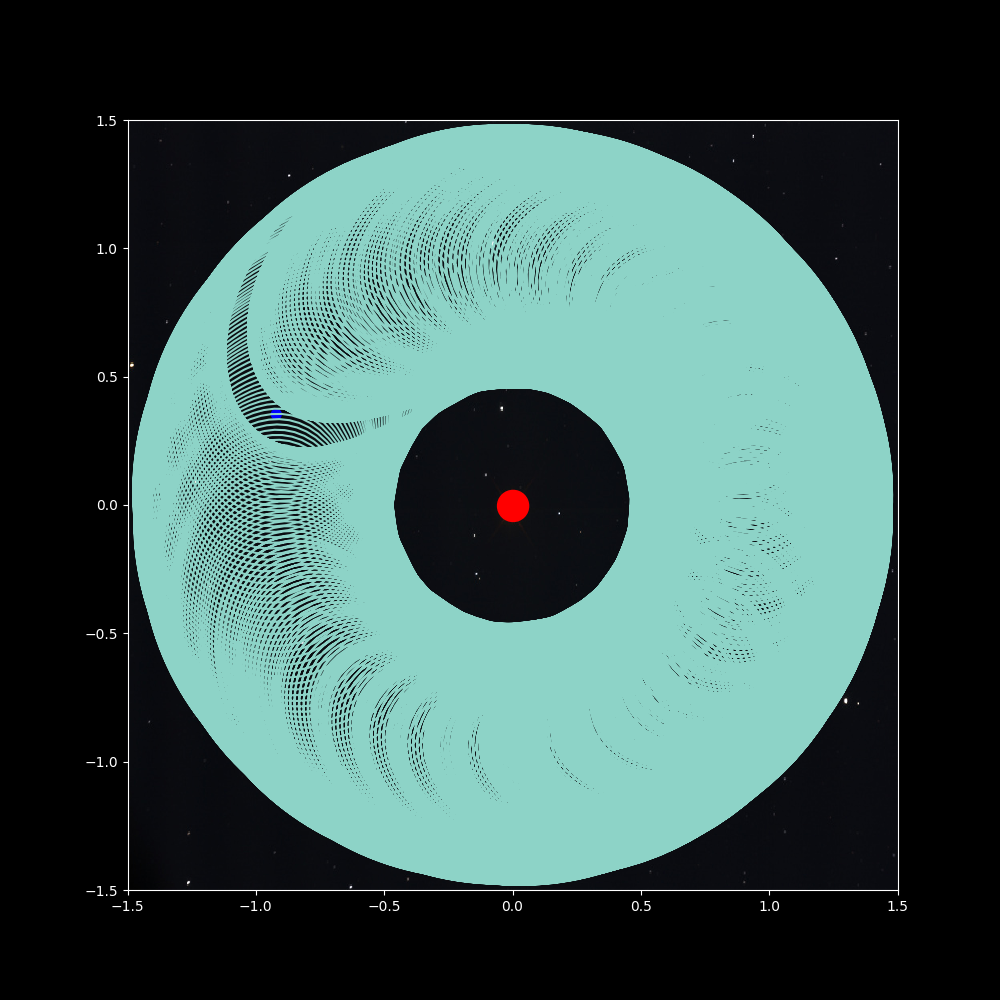

/afs/inf.ed.ac.uk/user/s14/s1439626/SHP/Cruithne3753/env/lib/python3.4/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


In [50]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


x_pos = [earth_pos[0,0],sun_pos[0,0],cruithne_pos[0,0]]
y_pos = [earth_pos[0,1],sun_pos[0,1],cruithne_pos[0,1]]
line_x = []
line_y = []
scat = ax.scatter(x_pos,  \
                  y_pos,   \
                  c=['b','r','g'], marker="o", s=[50,500,20])
line, = ax.plot(line_x,line_y)
img = imread("stars.jpg")
plt.imshow(img, zorder=0, extent=[-1.6, 1.6, -1.6, 1.6])

def update(frame):
    x_pos = [earth_pos[frame,0],sun_pos[frame,0],cruithne_pos[frame,0]]
    y_pos = [earth_pos[frame,1],sun_pos[frame,1],cruithne_pos[frame,1]]
    scat.set_offsets(np.c_[x_pos,y_pos])
    
    line_x.append(cruithne_pos[frame,0])
    line_y.append(cruithne_pos[frame,1])
    line.set_data(line_x,line_y)
    return scat, line,


ani = animation.FuncAnimation(fig, update, blit=True,interval=1)
plt.show()

<IPython.core.display.Javascript object>


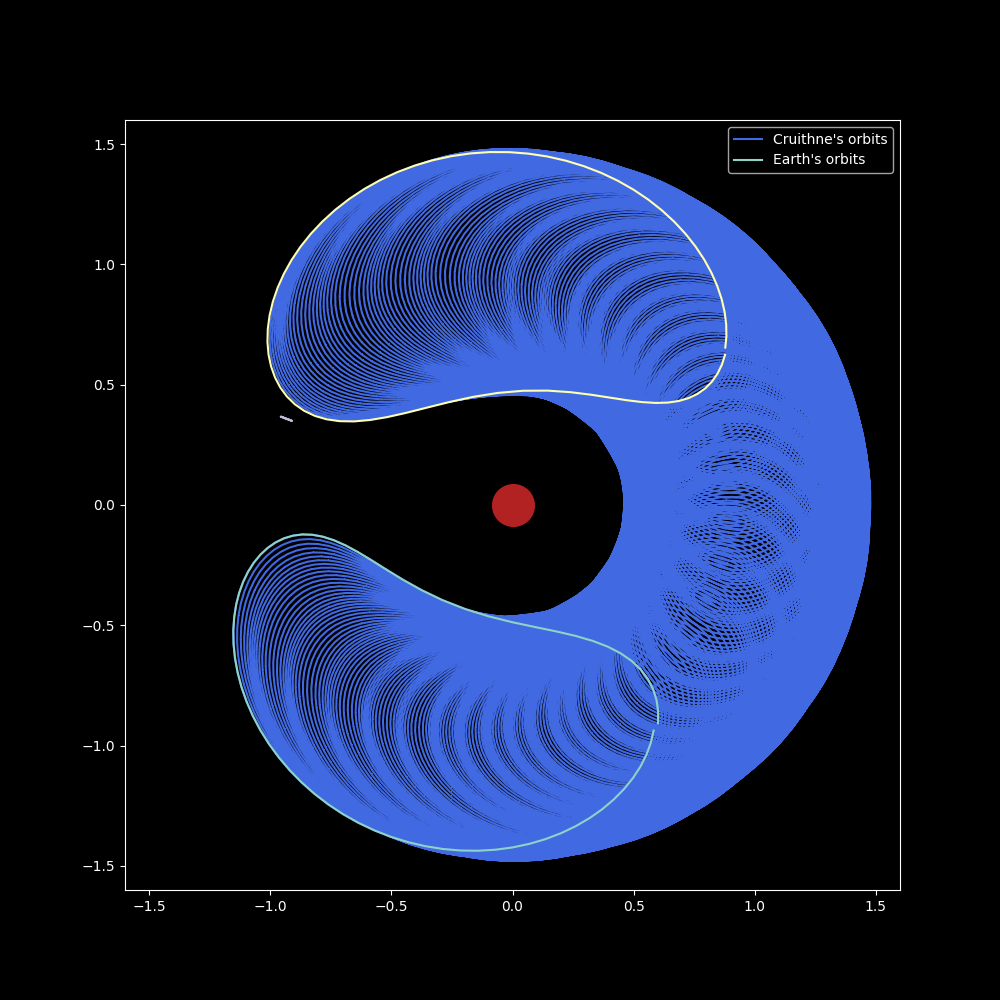

/afs/inf.ed.ac.uk/user/s14/s1439626/SHP/Cruithne3753/env/lib/python3.4/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


(-1.6, 1.6)

In [47]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.style.use('dark_background')
plt.plot(cruithne_pos[:20121,0],cruithne_pos[:20121,1],color='royalblue',marker=',');
plt.plot(cruithne_pos[0:76,0],cruithne_pos[0:76,1]);
plt.plot(cruithne_pos[20121:20121+76,0],cruithne_pos[20121:20121+76,1]);
plt.plot(earth_pos[:,0],earth_pos[:,1]);
plt.plot(0,0,marker='o',markersize=30,color='firebrick')
plt.legend(['Cruithne\'s orbits','Earth\'s orbits'])

img = imread("stars.jpg")
#plt.imshow(img, zorder=0, extent=[-1.6, 1.6, -1.6, 1.6])
ax.set_xlim(-1.6, 1.6)
ax.set_ylim(-1.6, 1.6)

In [45]:
print(50000*((2285-2019)/(2680-2019)))
print(50000/(2680-2019))
#     Noutputs = 50000
# #years = 2285-2019.
# years = 2680-2019.)

20121.028744326777
75.642965204236


<IPython.core.display.Javascript object>


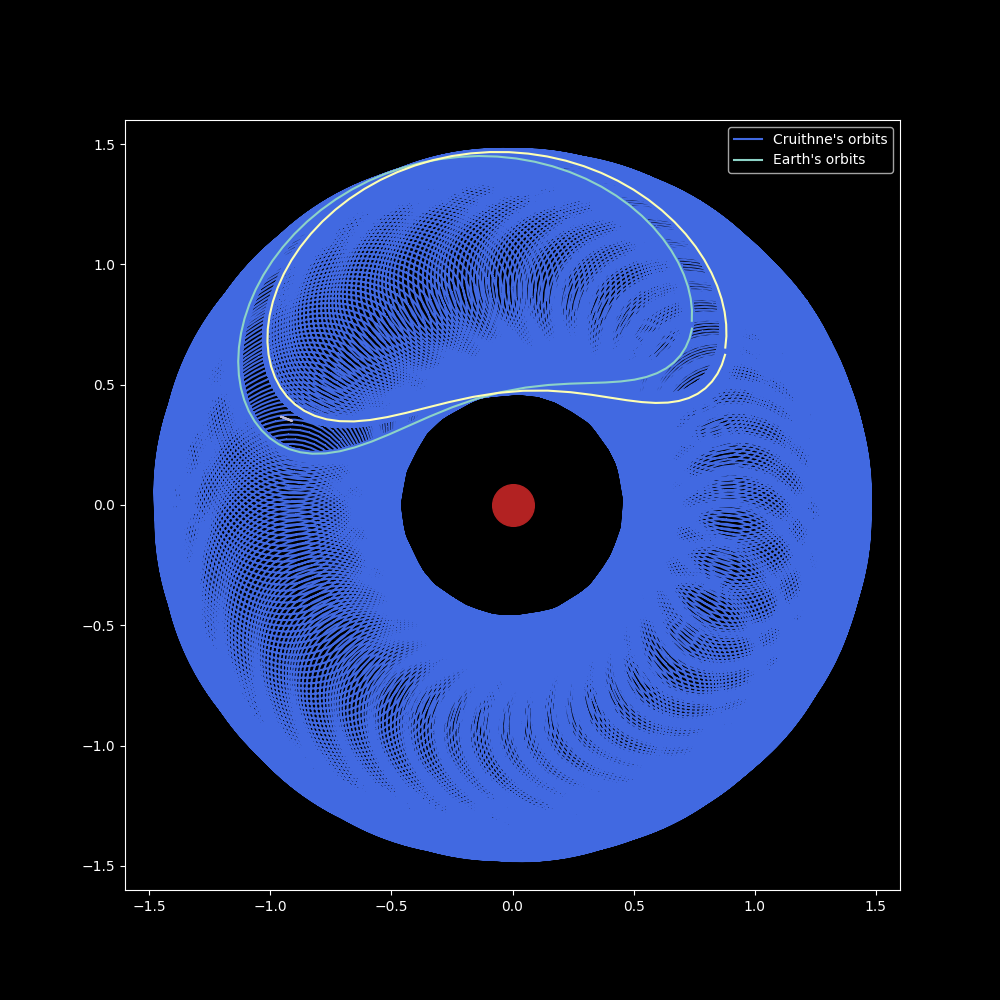

/afs/inf.ed.ac.uk/user/s14/s1439626/SHP/Cruithne3753/env/lib/python3.4/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


(-1.6, 1.6)

In [49]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.style.use('dark_background')
plt.plot(cruithne_pos[20121:,0],cruithne_pos[20121:,1],color='royalblue',marker=',');
plt.plot(cruithne_pos[-77:-1,0],cruithne_pos[-77:-1,1]);
plt.plot(cruithne_pos[20121:20121+76,0],cruithne_pos[20121:20121+76,1]);
plt.plot(earth_pos[:,0],earth_pos[:,1]);
plt.plot(0,0,marker='o',markersize=30,color='firebrick')
plt.legend(['Cruithne\'s orbits','Earth\'s orbits'])

img = imread("stars.jpg")
#plt.imshow(img, zorder=0, extent=[-1.6, 1.6, -1.6, 1.6])
ax.set_xlim(-1.6, 1.6)
ax.set_ylim(-1.6, 1.6)